In [2]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=aa26f086a762e8ba67b59e5cc937a5d3f46525d310e42be0fb5e5d4bda726138
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [18]:
import wget
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import urllib.request

#### 차원 축소
- 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 데이터 세트를 생성

-	일반적으로 차원이 증가할수록 데이터 간의 거리가 기하급수적으로 증가하기 때문에 희소한 구조를 가지게 되어 모델 예측 신뢰도가 떨어짐

- 1) 피처 선택 : 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거
    - 장점 : 선택한 피처의 해석이 용이
    - 단점 : 피처간 상관관계를 고려하기 어려움

- 2) 피처 추출 : 기존 피처를 저차원의 중요 피처로 압축해서 추출
    - 장점 : 피처 간 상관관계를 고려하기 용이하고 개수를 많이 줄일 수 있음
    - 단점 : 추출된 변수의 해석이 어려움

#### PCA(Principal Component Analysis) 주성분 분석

-	가장 대표적인 차원 축소 기법
-	여러 변수 간에 존재하는 상관관계를 이용해 주성분 추출하여 차원 축소


In [16]:
!wget -O pca.png https://github.com/hamjang/NLP/blob/main/image/pca.jpg

--2023-01-16 01:50:09--  https://github.com/hamjang/NLP/blob/main/image/pca.jpg
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘pca.png’

pca.png                 [ <=>                ] 138.00K  --.-KB/s    in 0.02s   

2023-01-16 01:50:10 (5.51 MB/s) - ‘pca.png’ saved [141317]



In [19]:
def url_to_image(url):
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype='uint8')
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)

  return image

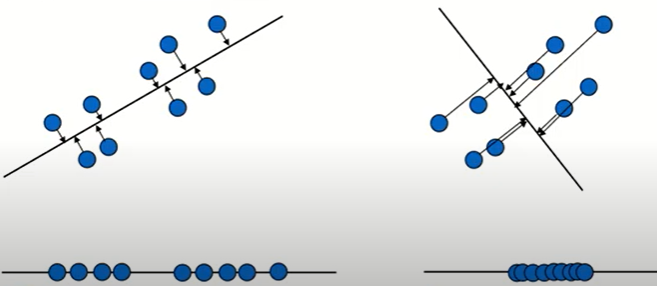

In [23]:
pca = url_to_image('https://github.com/hamjang/NLP/blob/main/image/pca.jpg?raw=true')
cv2_imshow(pca)

-	가장 높은 분산을 가지는 데이터의 축을 찾아 그 축으로 차원을 축소, 이 축을 주성분이라 한다.

- 1.) 가장 큰 분산을 기반으로 첫 번째 축을 생성
- 2.) 첫 번째 축에 직각이 되는 벡터를 축으로 설정하여 생성
- 3.) 위 단계를 반복 ( 벡터 축의 개수만큼 원본데이터 차원 축소 )
     - 직각이 되는 벡터를 다음 축으로 설정하는 이유 : 첫 번째 축으로는 같은 점으로 사영되는 데이터 10개를 모두 설명할 수 없어서

#### 공분산
- 2개 변수가 함께 변하는 정도를 측정
   - ex) 한 변수 값이 커지면서 다른 값 증가
      - 두 변수의 변화 걍햐엉이 유사하다면 공분산은 양수, 두 변수의 선형적 관계를 설명하는 지표

- cov(x,y)=E[(x−E[x])(y−E[y])]=E[xy−xE[y]−E[x]x+E[x]E[y]]=E[xy]−E[x]E[y]−E[x]E[y]+E[x]E[y]=E[xy]−E[x]E[y]
   - E[x] : 변수 x의 기댓값

#### 공분산 행렬
 - 변수들 사이의 공분산을 행렬 형태로 나타낸 것
    - 정방향렬, 전치를 시켰을 때 동일한 행렬이 나타나는 대칭 행렬
- 1.) 각 feature 들의 퍼져있음이 얼마나 유사하냐
- 2.) 각 feature 간의 내적을 통해 feature의 변동이 얼마나 닮았는지 알 수 있다.

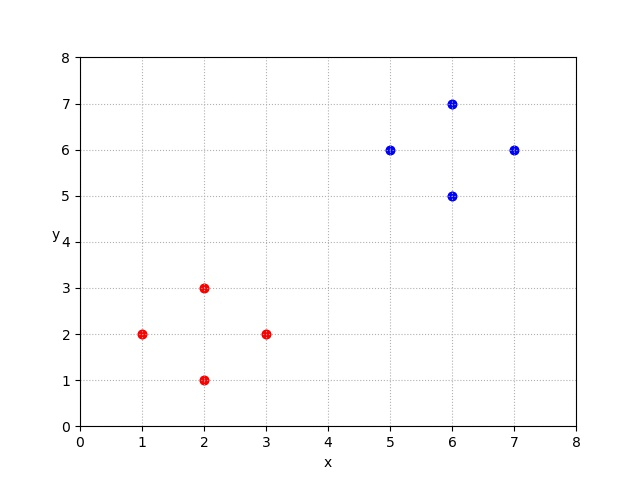

In [24]:
cov = url_to_image('https://github.com/hamjang/NLP/blob/main/image/covariance.jpg?raw=true')
cv2_imshow(cov)

- cov(x,y)=E[(x−E[x])(y−E[y])]=(1−2)(2−2)+(2−2)(1−2)+(2−2)(3−2)+(3−2)(2−2)/4=0/4=0

- cov(x,x)=E[(x−E[x])(x−E[x])]=(1−2)(1−2)+(2−2)(2−2)+(2−2)(2−2)+(3−2)(3−2)/4=2/4=1/2

- cov(y,y)=E[(y−E[y])(y−E[y])]=(2−2)(2−2)+(1−2)(1−2)+(3−2)(3−2)+(2−2)(2−2)/4=2/4=1/2

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
iris = load_iris()
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_iris = pd.DataFrame(iris.data, columns = columns)
df_iris['target'] = iris.target
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


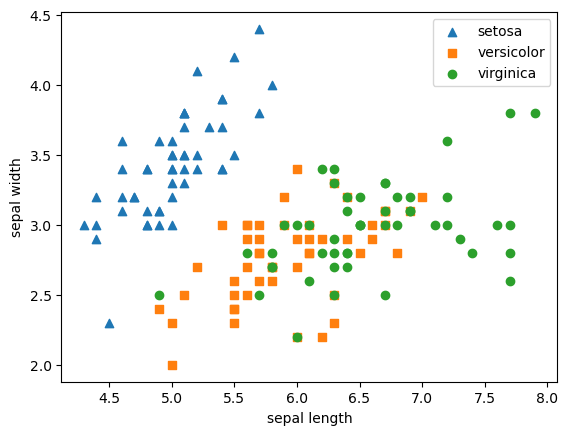

In [ ]:
markers=['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data=df_iris[df_iris['target']==i]['sepal_length']
    y_axis_data=df_iris[df_iris['target']==i]['sepal_width']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler=StandardScaler()
iris_scaled=scaler.fit_transform(df_iris.iloc[:,:-1])

# pca를 통한 2차원으로 차원 축소
pca=PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)

pca_columns=['pca_component_1','pca_component_2']
df_iris_pca=pd.DataFrame(iris_pca,columns=pca_columns)
df_iris_pca['target']=iris.target
df_iris_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


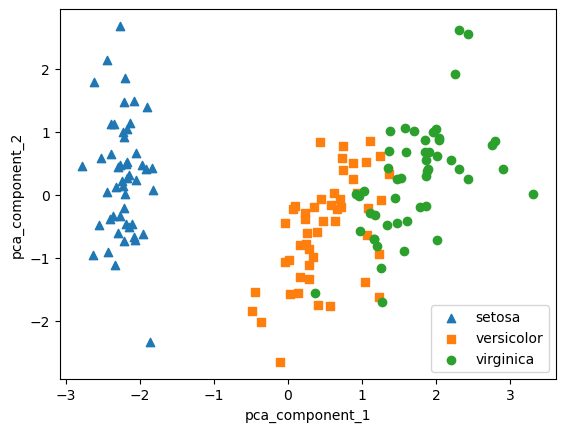

In [ ]:
for i, marker in enumerate(markers):
    x_axis_data=df_iris_pca[df_iris_pca['target']==i]['pca_component_1']
    y_axis_data=df_iris_pca[df_iris_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

- 첫 번째 주성분 약 73%
- 두 번째 주성분 약 23%
- 원본 데이터의 96%를 설명

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# 원본 데이터 
rf_clf = RandomForestClassifier(random_state = 156)
scores = cross_val_score(rf_clf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 평균 정확도 : {0: .4f}'.format(np.mean(scores)))

# PCA변환 후 데이터
pca_X = df_iris_pca[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(rf_clf,pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 후 교차 검증 평균 정확도 :{0: .4f}'.format(np.mean(scores_pca)))

원본 데이터 교차 검증 평균 정확도 :  0.9600
PCA 변환 후 교차 검증 평균 정확도 : 0.8800


- PCA의 주요 한계점 : 최대의 분산의 각 축이 반드시 클래스 간의 구별을 잘하는 좋은 피처를 뽑아준다는 보장이 없다

#### LDA(Linear Discriminant Analysis) 선형 판별 분석법
- PCA와 유사
- 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원 축소 ( 주요 차이 )

-  입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾음
     - 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산을 최대화하고, 클래스 내부 분산은 최대한 작게 가져가는 방식
    - 클래스의 값들은 모여있고, 클래스끼리는 서로 많이 떨어져 있음

- 클래스 내부와 클래스 간 분산 행렬에 기반해 고유벡터를 구하고 입력 데이터를 투영

- 1.) 클래스 내부와 클래스 간 분산 행렬을 구함
- 2.) 클래스 내부 분산 행렬의 역치 행렬과 클래스 간 분산 행렬의 곱을 분해하여 고유벡터와 고유값을 구함
- 3.) 고유값이 가장 큰 수으로 K개 추출
- 4.) 추출된 고유벡터를 이용해 입력 데이터를 선형 변환
    - 클래스의 target값을 변환 시 추가

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = np.array([[-1,-1], [-2,-1], [-3,-2], [1,1], [2,1], [3,2]])
y = np.array([1,1,1,2,2,2])

In [ ]:
clf = LinearDiscriminantAnalysis()
clf.fit(X,y)

# y : 클래스 target값

LinearDiscriminantAnalysis()

In [ ]:
clf.predict([[-0.8,-1]])

array([1])

#### T-SNE (t-distributed stochastic neighbor embedding)

- 높은 차원의 복잡한 데이터를 2차원에 차원 축소하는 방법
- 비슷한 구조끼리 데이터를 정리한 상태이므로 데이터 구조를 이해하는데 도움을 준다

- t-SNE를 사용하면 높은 차원 공간에서 비슷한 데이터 구조는 낮은 차원 공간에서 가깝게 대응하며, 비슷하지 않은 데이터 구조는 멀리 떨어져 대응된다.
- 이웃 데이터 포인트에 대한 정보를 보전히려고 한다

- input feature를 확인하기가 어렵다. t-SNE 결과만으로 무언가를 추론하기는 얿다
- 시각화 툴로 사용

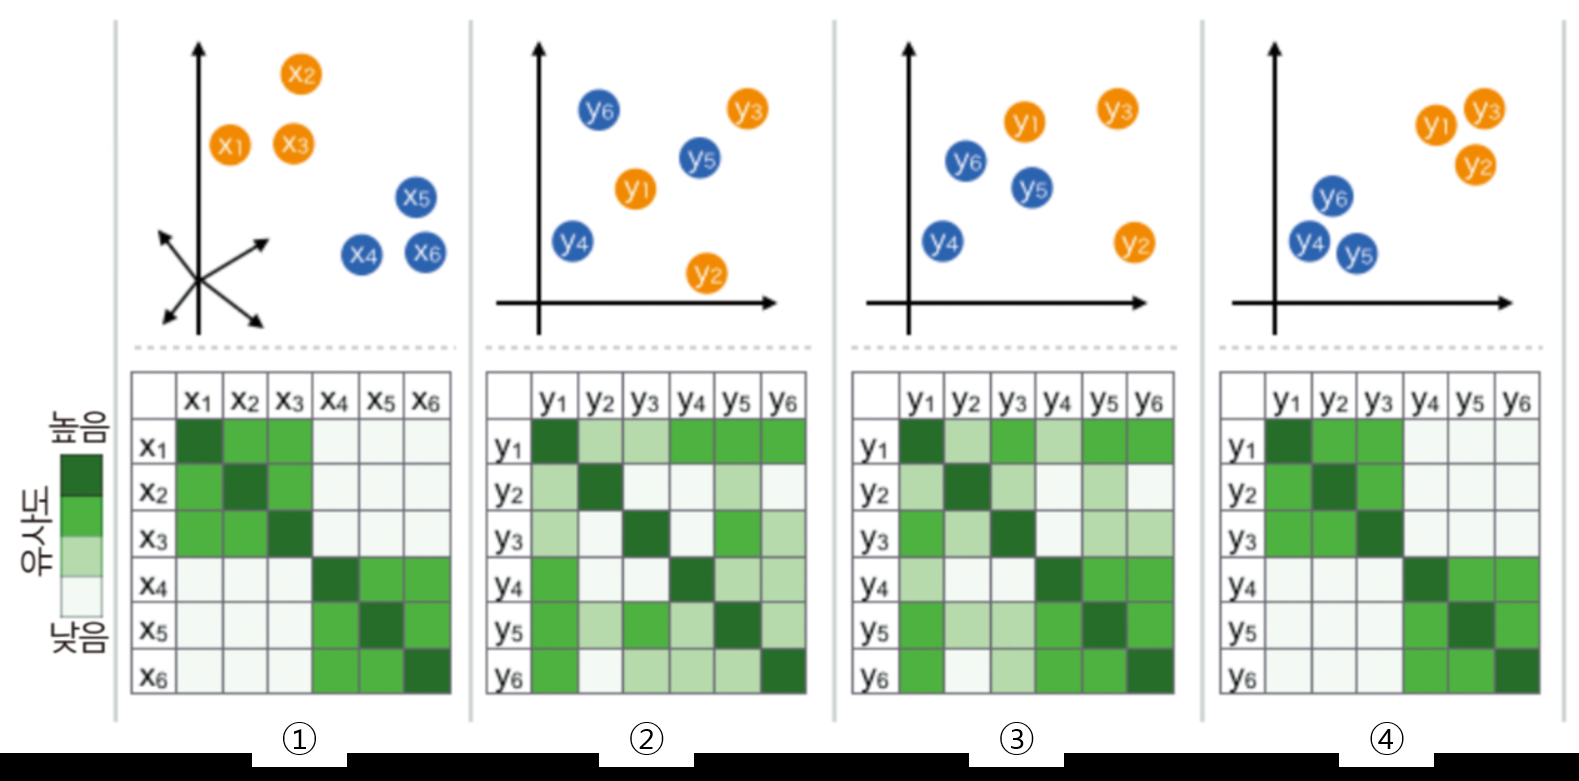

In [26]:
tsne1 = url_to_image('https://github.com/hamjang/NLP/blob/main/image/t-sne1.jpg?raw=true')
cv2_imshow(tsne1)

1. 모든 i,j 쌍에 대하여 xi, xj의 유사도를 가우시안 분포를 이용해 나타냄
2. xi와 같은 개수의 점 yi를 낮은 차원 공간에 무작위로 배치하고, 모둔 i,j쌍에 관하여 yi,yj의 유사도를 t-SNE를 이용해 나타냄
3. 1,2,에서 정의한 유사도 분포가 가능하면 같아지도록 데이터 포인터 yi를 갱신
4. 수렴 조건까지 3을 반복

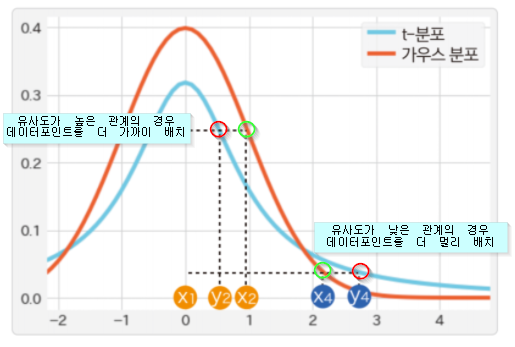

In [27]:
tsne2 = url_to_image('https://github.com/hamjang/NLP/blob/main/image/t-sne2.jpg?raw=true')
cv2_imshow(tsne2)

- 데이터 사이의 거리를 이용하는 것이 아니라 확률 분포를 이용

- 수식적 의미
   1. 비선형적인 차원 축소 방법
   2. 고차원 공간에서의 유사성과 그에 해당하는 저차원 공간에서의 점들의 유사성 계산
   3. 점들의 유사도는 A를 중심으로 한 정규 분포에서 확률 밀도에 비례하여 이웃을 선택하면 포인트 A가 포인트 B를 이웃으로 선택한다는 조건부 확률로 계산된다.
   4. 조건부 확률 간의 차이를 최소화려고 시도한다.
   5. 조건부 확률의 차이의 합을 최소화하기 위해 gradient descent 방식을 사용하여 전체 데이터 포인트의 KL-divergence 합계를 최소
      - divergence 또는 KLdivergence 는 한 확률 분포가 두 번째 예상 확률 분포와 어떻게 다른지 측정하는 척도
   6. 두 가지 분포의 KL divergence를 최소화
      - 입력 객체들의 쌍으로 이루어진 유사성을 측정하는 분포
      - 저차원 점들의 쌍으로 유사성을 측정하는 분포
   7. 다차원 데이터를 보다 낮은 차원 공간으로 매핑하고, 다수의 특징을 갖는 데이터 포인트의 유사성을 기반으로 점들의 클러스터를 식별함으로 데이터에서 패턴을 발견

In [28]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# 데이터셋 로드
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris.data, iris.target] , 
                  columns= ['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

In [29]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [30]:
from sklearn.manifold import TSNE

# class target 정보 제외
train_df = df[['sepal length', 'sepal width', 'petal length', 'petal width']]

# 2차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 2).fit_transform(train_df)

# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [31]:
tsne_df.head()

,component 0,component 1
0,25.843559,-5.359655
1,23.423601,-4.683797
2,23.103775,-5.700483
3,22.844229,-5.472354
4,25.954870,-5.008222


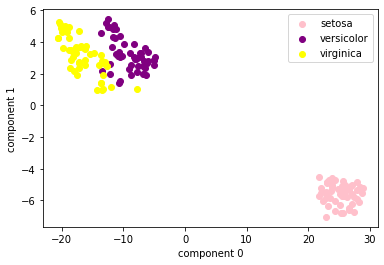

In [32]:
import matplotlib.pyplot as plt

# class target 정보 불러오기 
tsne_df['target'] = df['target']

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

# target 별 시각화
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'pink', label = 'setosa')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'purple', label = 'versicolor')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color = 'yellow', label = 'virginica')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

In [33]:
# 3차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 3).fit_transform(train_df)

# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1', 'component 2'])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


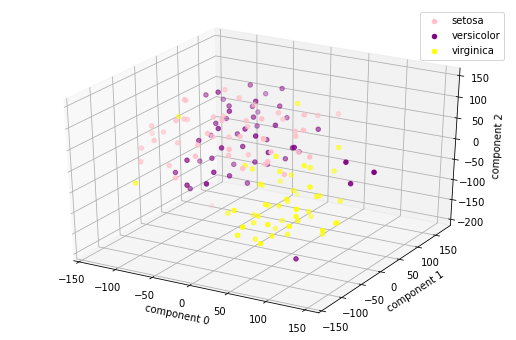

In [34]:
from mpl_toolkits.mplot3d import Axes3D

# 3차원 그래프 세팅
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# class target 정보 불러오기 
tsne_df['target'] = df['target']

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

# target 별 시각화
ax.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], tsne_df_0['component 2'], color = 'pink', label = 'setosa')
ax.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], tsne_df_1['component 2'], color = 'purple', label = 'versicolor')
ax.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], tsne_df_2['component 2'], color = 'yellow', label = 'virginica')

ax.set_xlabel('component 0')
ax.set_ylabel('component 1')
ax.set_zlabel('component 2')
ax.legend()
plt.show()

#### UMAP ( Uniform Manifold Approximation and Projection)

1. topological data analysis 분석
2. manifold learning
- 두 가지 기반 한 차원 축소 알고리즘
- 수학적으로 t-SNE보다 더 견고하게 설계
- 비선형 방식의 매니폴드 학습 기룻을 기반으로 한 차원축소 방법

- neighboring graph 기반
- 가장 좋은 성능을 내는 알고리즘

- 높은 차원 공간에서의 데이터를 그래프로 만들고 낮은 차원을 graph projection

- 장점 
   1. embedding 차원 크기에 대한 제한이 없어서 일반적인 차원 축소 알고리즘으로 적용 가능함
   2. global structure를 더 잘 보존
   3. 리만 기하학, 위상 수학에 기반하여 탄탄한 이론 배경

- 단점
   1. Hyperparameter의 영향을 크게 받는다.
   2. 저차원으로 임베딩되어 가시화 된결과에서 각 데이터간 거리와 실제 데이터 간 거리가 맞지 않다.
   3. 저차원 임베딩 시 정보손실에 의한 데이터 왜곡

In [36]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [37]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
# 시각화 설정

In [38]:
penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv")
penguins.head()
# dataload

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [39]:
penguins = penguins.dropna()
penguins.species.value_counts()
# 결측치 제거

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

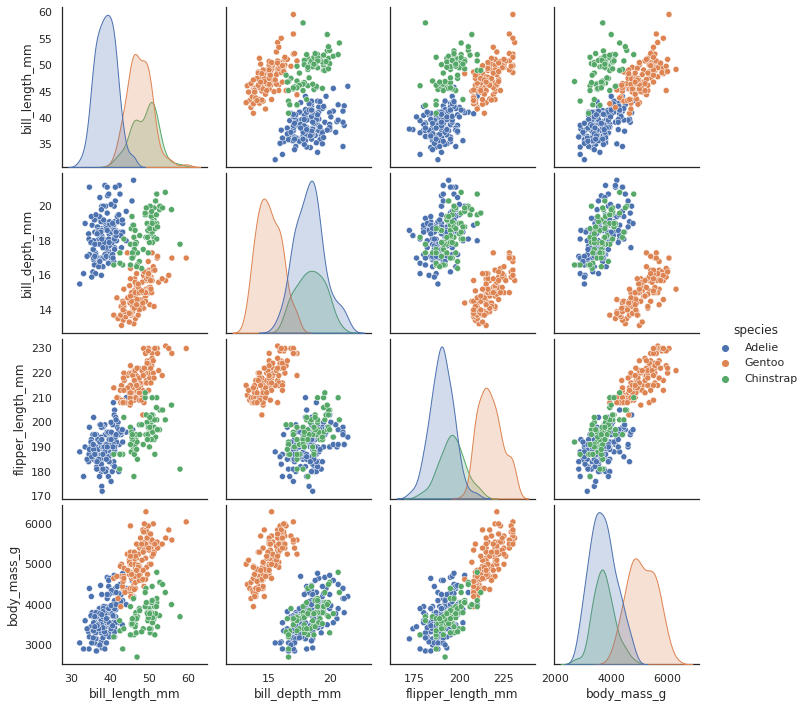

In [40]:
sns.pairplot(penguins.drop("year", axis=1), hue='species');

In [42]:
pip install umap-learn
# umap 설치

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=f2416f2ac2fee289a149c933594d3e070f914c777d927aa817ab6cfe14b8acfe
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=62529275d67dc8ba913b1eee0f874824b03c45f3b85f2995e8c1ed029d536658
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [43]:
import umap

In [44]:
reducer = umap.UMAP()

In [45]:
penguin_data = penguins[
    [
        "bill_length_mm",
        "bill_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

# 필요한 데이터들을 가져오고 표준화 과정

In [46]:
embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape

# UMAP을 통한 차원 축소 2차원

(333, 2)

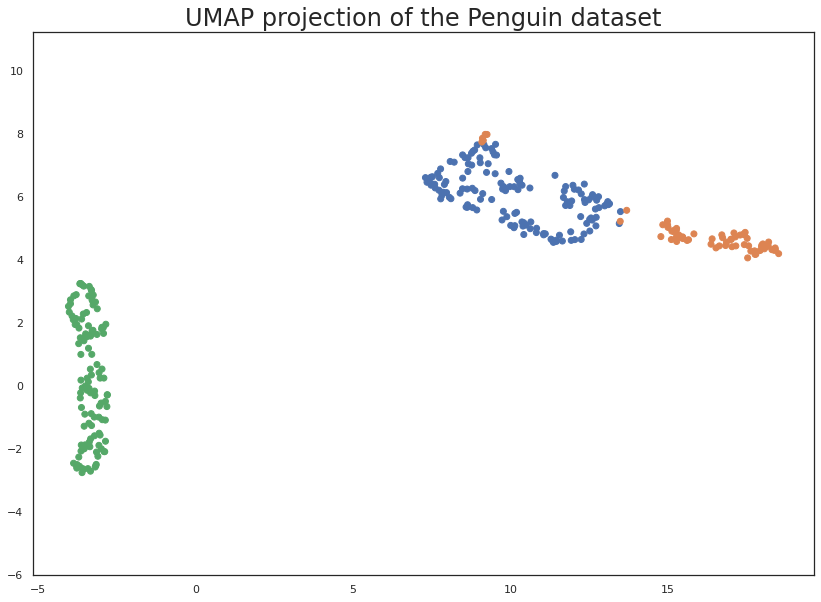

In [47]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24);